In [45]:
# importing libraries / dependencies
import numpy as np # data manipulation krne ke liye
import pandas as pd # numerical operation perform hote
import matplotlib.pyplot as plt #for visualization like plot
import seaborn as sns # for data visualization
from sklearn.model_selection import train_test_split #for testing data set
from sklearn.linear_model import LinearRegression #for linear model module
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
from scipy import stats #hypothesis testing ke liye use ki he
from scipy.stats import chi2_contingency, boxcox,normaltest

**Data collection and processing**


In [46]:
#csv file  se data load kiya pandas dataframe me
from google.colab import files
files.upload()
insurance_dataset =pd.read_csv('/content/insurance.csv')

insurance_dataset.head()

Saving insurance.csv to insurance (3).csv


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [22]:
# kitni rows and column he
insurance_dataset.shape

(1338, 7)

In [23]:
#information dataset ke bare me
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [24]:
# missing vaue check kari he is cell me
insurance_dataset.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


statistical Measures of dataset

In [7]:
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


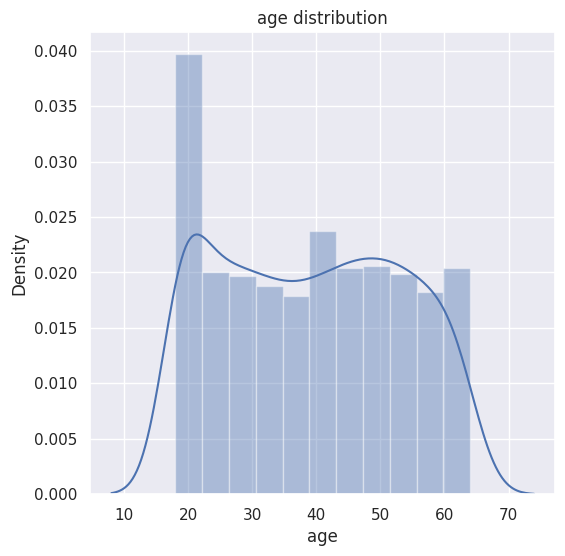

In [8]:
#age value ka distribution pata karenge
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['age'])
plt.title('age distribution')
plt.show()


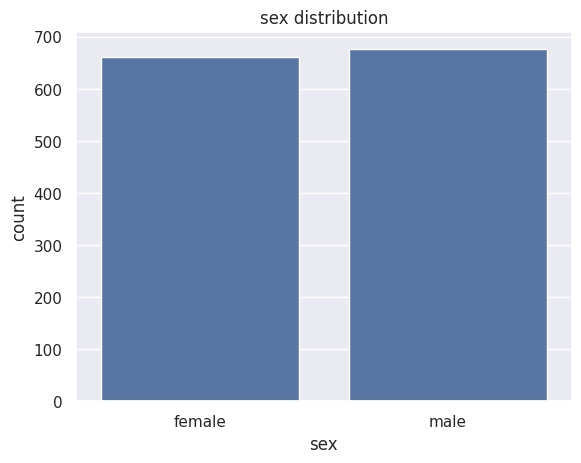

In [9]:
#for sex
plt.title('sex distribution')
sns.countplot(x='sex',data=insurance_dataset)
plt.show()

Text(0.5, 1.0, 'BMI distribution')

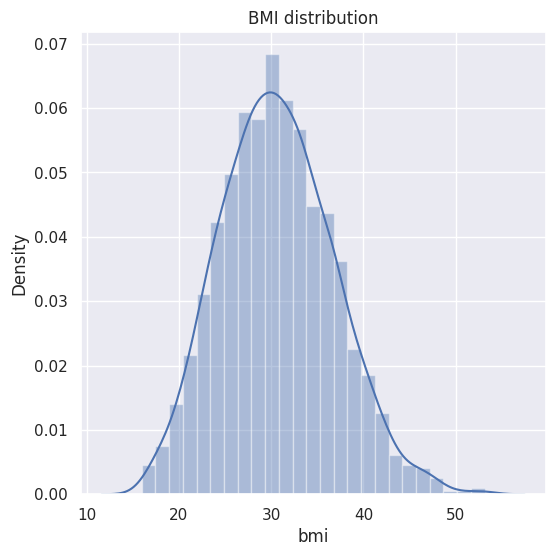

In [10]:
#for BMI
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['bmi'])
plt.title('BMI distribution')

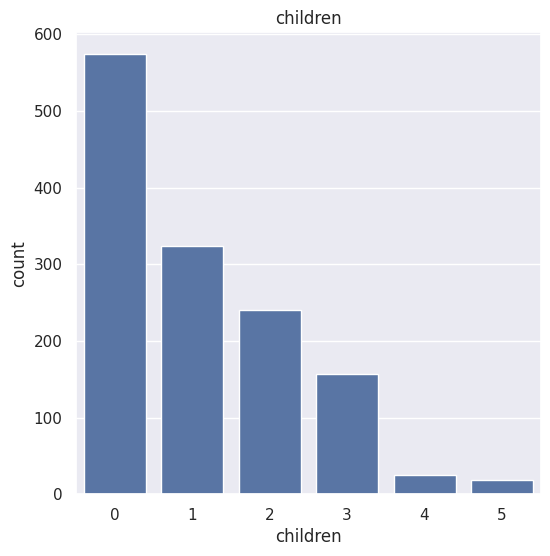

In [11]:
#for children
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=insurance_dataset)
plt.title('children')
plt.show()

categorical Features

*   sex
*   region
*   smoker





In [12]:
#sex column ki encoding
insurance_dataset.replace({'sex':{'male':0,'female':1}},inplace=True)

#smoker column ki encoding
insurance_dataset.replace({'smoker':{'yes':0,'no':1}},inplace=True)

#encoding region column
insurance_dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


In [13]:
#splitting the feature and target
X=insurance_dataset.drop(columns='charges',axis=1)
Y=insurance_dataset['charges']
print(X)
print(Y)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=2)
print(X.shape,X_train.shape,X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [15]:
#model training
model=LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [16]:
#training data pr prediction
prediction_on_train_Data=model.predict(X_train)
print(prediction_on_train_Data)

[  478.49404197  9317.75369733 13193.79859142 ... 17327.55442479
  9600.51860822 13753.18970971]


In [17]:
#R root method
r2_train=metrics.r2_score(Y_train,prediction_on_train_Data)
print(r2_train)

0.751505643411174


In [18]:
#prediction on test data
prediction_on_train_Data=model.predict(X_test)
r2_test=metrics.r2_score(Y_test,prediction_on_train_Data)
print(r2_train)

0.751505643411174


In [19]:
# making predictive system
input_data=(31,1,25.74,0,1,0)
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=model.predict(input_data_reshaped)
print(prediction)

[3760.0805765]


**Hypothesis Testing**

In [28]:
#smoker and nonsmoker observations
smoker = insurance_dataset.loc[insurance_dataset.smoker=="yes"]
nonsmoker = insurance_dataset.loc[insurance_dataset.smoker=="no"]

#smoker and nonsmoker medical costs
smoker_medical_costs = smoker.charges
nonsmoker_medical_costs = nonsmoker.charges

In [29]:
smoker_ch_mean = smoker_medical_costs.mean()
smoker_ch_mean

np.float64(32050.23183153284)

[Text(0.5, 1.0, ' Smoker & non smoker charges difference')]

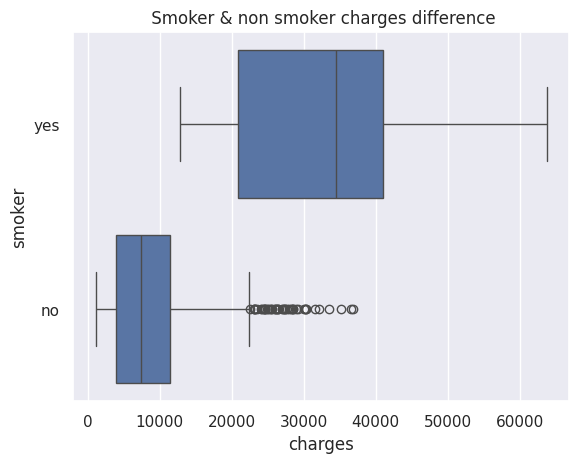

In [32]:
sns.boxplot(x=insurance_dataset.charges,y=insurance_dataset.smoker,data=insurance_dataset).set(title=" Smoker & non smoker charges difference")

**decision criteria and result*

In [33]:
apha=0.5
t_value2, p_value2 = stats.ttest_ind(smoker_medical_costs, nonsmoker_medical_costs)
p_value_onetail=p_value2/2
print("t_value2 = ",t_value2, ", p_value2 = ", p_value2, ",p_value_onetail = ", p_value_onetail)

t_value2 =  46.66492117272371 , p_value2 =  8.271435842179102e-283 ,p_value_onetail =  4.135717921089551e-283


null hypothesis for smoker is rejected because p value is greater than alpha(significance value) this means people who smoke have higher medical cost.

HO: Smokers are not different in different regions

In [36]:
#calculate contigency table
contingency_table = pd.crosstab(insurance_dataset.region, insurance_dataset.smoker)
contingency_table

smoker,no,yes
region,,
northeast,257,67
northwest,267,58
southeast,273,91
southwest,267,58


<Axes: xlabel='region'>

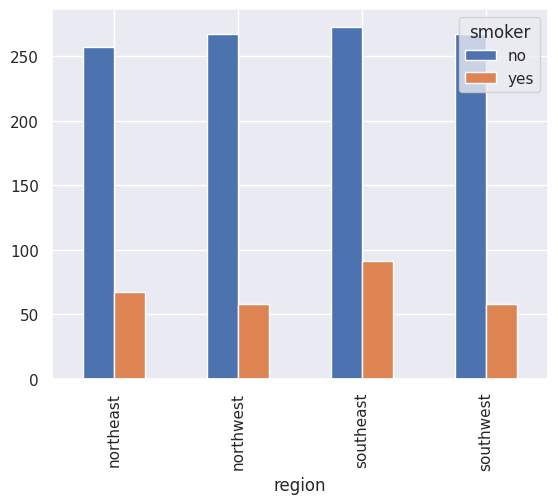

In [37]:
contingency_table.plot(kind='bar')

In [47]:

significance_value=0.05
chi2, p_val, dof, exp_freq =chi2_contingency(contingency_table, correction = False)
print('chi-square statistic: {} , p_value: {} , degree of freedom: {} ,expected frequencies: {} '.format(chi2, p_val, dof, exp_freq))

chi-square statistic: 7.343477761407071 , p_value: 0.06171954839170541 , degree of freedom: 3 ,expected frequencies: [[257.65022422  66.34977578]
 [258.44544096  66.55455904]
 [289.45889387  74.54110613]
 [258.44544096  66.55455904]] 


smokers are same across all the region

****